In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('data.csv')

In [4]:
df.head(3)

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1


In [5]:
df.shape

(4009, 4)

In [16]:
import nltk
nltk.download('stopwords')
import seaborn as sns
import string
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ehsan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [17]:
df_train = df
df_train.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [18]:
df_train.shape

(4009, 4)

In [19]:
df_train.isnull().sum()

URLs         0
Headline     0
Body        21
Label        0
dtype: int64

In [20]:
df_train = df_train.dropna(axis = 0)

In [21]:
stopwords = set(nltk.corpus.stopwords.words('english'))
punctuations = set(string.punctuation)

In [22]:
def clean_text(df, column):
    df[column] = df[column].apply(lambda x: ' '.join([word for word in x.split() \
                                                      if word not in stopwords \
                                                      and word not in punctuations]))

In [24]:
clean_text(df_train, 'Headline')

<ipython-input-22-428b0bc99e63>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].apply(lambda x: ' '.join([word for word in x.split() \


In [25]:
df_train['Headline'] = df_train['Headline'].str.lower()

<ipython-input-25-fb43aea4f864>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Headline'] = df_train['Headline'].str.lower()


In [26]:
df_train.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,four ways bob corker skewered donald trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,linklater's war veteran comedy speaks modern a...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,trump’s fight with corker jeopardizes his legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,egypt's cheiron wins tie-up pemex mexican onsh...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,jason aldean opens 'snl' vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [27]:
X_train, X_valid, y_train, y_valid = train_test_split(
    df_train['Headline'], df_train['Label'], 
    test_size = 0.3, random_state = 42) 

In [28]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('model', LogisticRegression())])

model = pipe.fit(X_train, y_train)

In [29]:
y_pred_train = model.predict(X_train)
print("Accuracy train: {}%".format(accuracy_score(y_train, y_pred_train)))
y_pred_valid = model.predict(X_valid)
print("Accuracy valid: {}%".format(accuracy_score(y_valid, y_pred_valid)))

Accuracy train: 0.9931924041562165%
Accuracy valid: 0.8805346700083542%


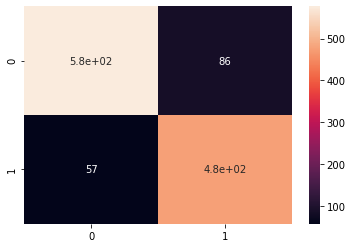

In [30]:
sns.heatmap(confusion_matrix(y_valid, y_pred_valid), annot = True)

In [32]:
y_pred_test = model.predict(df_train['Headline'])

In [34]:
df_train['Label'] = y_pred_test
df_train.head()

<ipython-input-34-1b7888e20c0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Label'] = y_pred_test


,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,four ways bob corker skewered donald trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,linklater's war veteran comedy speaks modern a...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,trump’s fight with corker jeopardizes his legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,egypt's cheiron wins tie-up pemex mexican onsh...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,jason aldean opens 'snl' vegas tribute,"Country singer Jason Aldean, who was performin...",1
